# CLASSIFICACIÓN

# **Predicción de Incendios Forestales**

Este conjunto de datos simula un estudio sobre la probabilidad de incendios en zonas forestales y contiene 1000 observaciones. Cada observación representa una zona geográfica en un momento determinado e incluye parámetros ambientales que pueden influir en la aparición de incendios.

Incluye 8 atributos, además del atributo que se quiere predecir (`fire`). Los valores de los atributos han sido generados para reflejar condiciones meteorológicas y ambientales que desempeñan un papel clave en la propagación de incendios.

## **Las características de cada muestra son**

- `temperature`: Temperatura ambiental en grados Celsius (°C)
- `humidity`: Porcentaje de humedad relativa en el aire (%)
- `wind_speed`: Velocidad del viento en km/h
- `precipitation`: Cantidad de precipitación acumulada en las últimas 24 horas (mm)
- `soil_dryness`: Índice de sequedad del suelo (0–100), donde 100 representa un suelo extremadamente seco
- `forest_density`: Porcentaje de cobertura forestal en la zona analizada (0.1–1.0)
- `sun_hours`: Número de horas de sol al día

## **Atributo a predecir**

- `fire`: Indica si se ha producido un incendio en la zona  
  - `no_fire` = 0 (no se ha producido incendio)  
  - `fire` = 1 (incendio detectado)

# Fase 1: Recopilación de los datos

In [ ]:
# Importación de las bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/CSV/wildfires.csv'
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fase 2: Exploración y preparación de los datos

In [ ]:
# Comprobación de que los datos se han cargado correctamente
df

,temperature,humidity,wind_speed,precipitation,soil_dryness,forest_density,sun_hours,fire
0,24.932771,29.237345,19.409151,31.720442,73.013363,0.682059,10.956946,no_fire
1,27.816982,55.706771,12.675036,25.977470,53.239811,0.460108,5.666198,no_fire
2,23.800353,57.928352,20.059318,32.772818,41.862009,0.449017,6.084841,fire
3,26.354897,47.184982,21.314765,12.959491,75.501170,0.497959,9.747597,fire
4,28.695189,58.471316,18.920163,33.485641,56.694146,0.468986,3.981641,no_fire
...,...,...,...,...,...,...,...,...
4995,24.183230,66.719747,19.419238,25.241275,24.267348,0.277676,7.510502,fire
4996,22.346014,39.082334,22.034633,30.920179,72.483091,0.670347,8.263846,no_fire
4997,26.139203,41.845262,9.765746,27.494043,65.220841,0.616424,7.154270,no_fire
4998,25.250211,45.111600,10.733052,26.153297,65.566847,0.608658,6.447664,no_fire


In [ ]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     5000 non-null   float64
 1   humidity        5000 non-null   float64
 2   wind_speed      5000 non-null   float64
 3   precipitation   5000 non-null   float64
 4   soil_dryness    5000 non-null   float64
 5   forest_density  5000 non-null   float64
 6   sun_hours       5000 non-null   float64
 7   fire            5000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 312.6+ KB


## Selección de características

No hay ninguna que eliminar

## Nulos

In [ ]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

temperature       0
humidity          0
wind_speed        0
precipitation     0
soil_dryness      0
forest_density    0
sun_hours         0
fire              0
dtype: int64


## Únicos

In [ ]:
# Comprobación de los valores únicos en la columna 'fire'
print(df['fire'].unique())

['no_fire' 'fire']


## Duplicados

In [ ]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 0


## Distribuciones

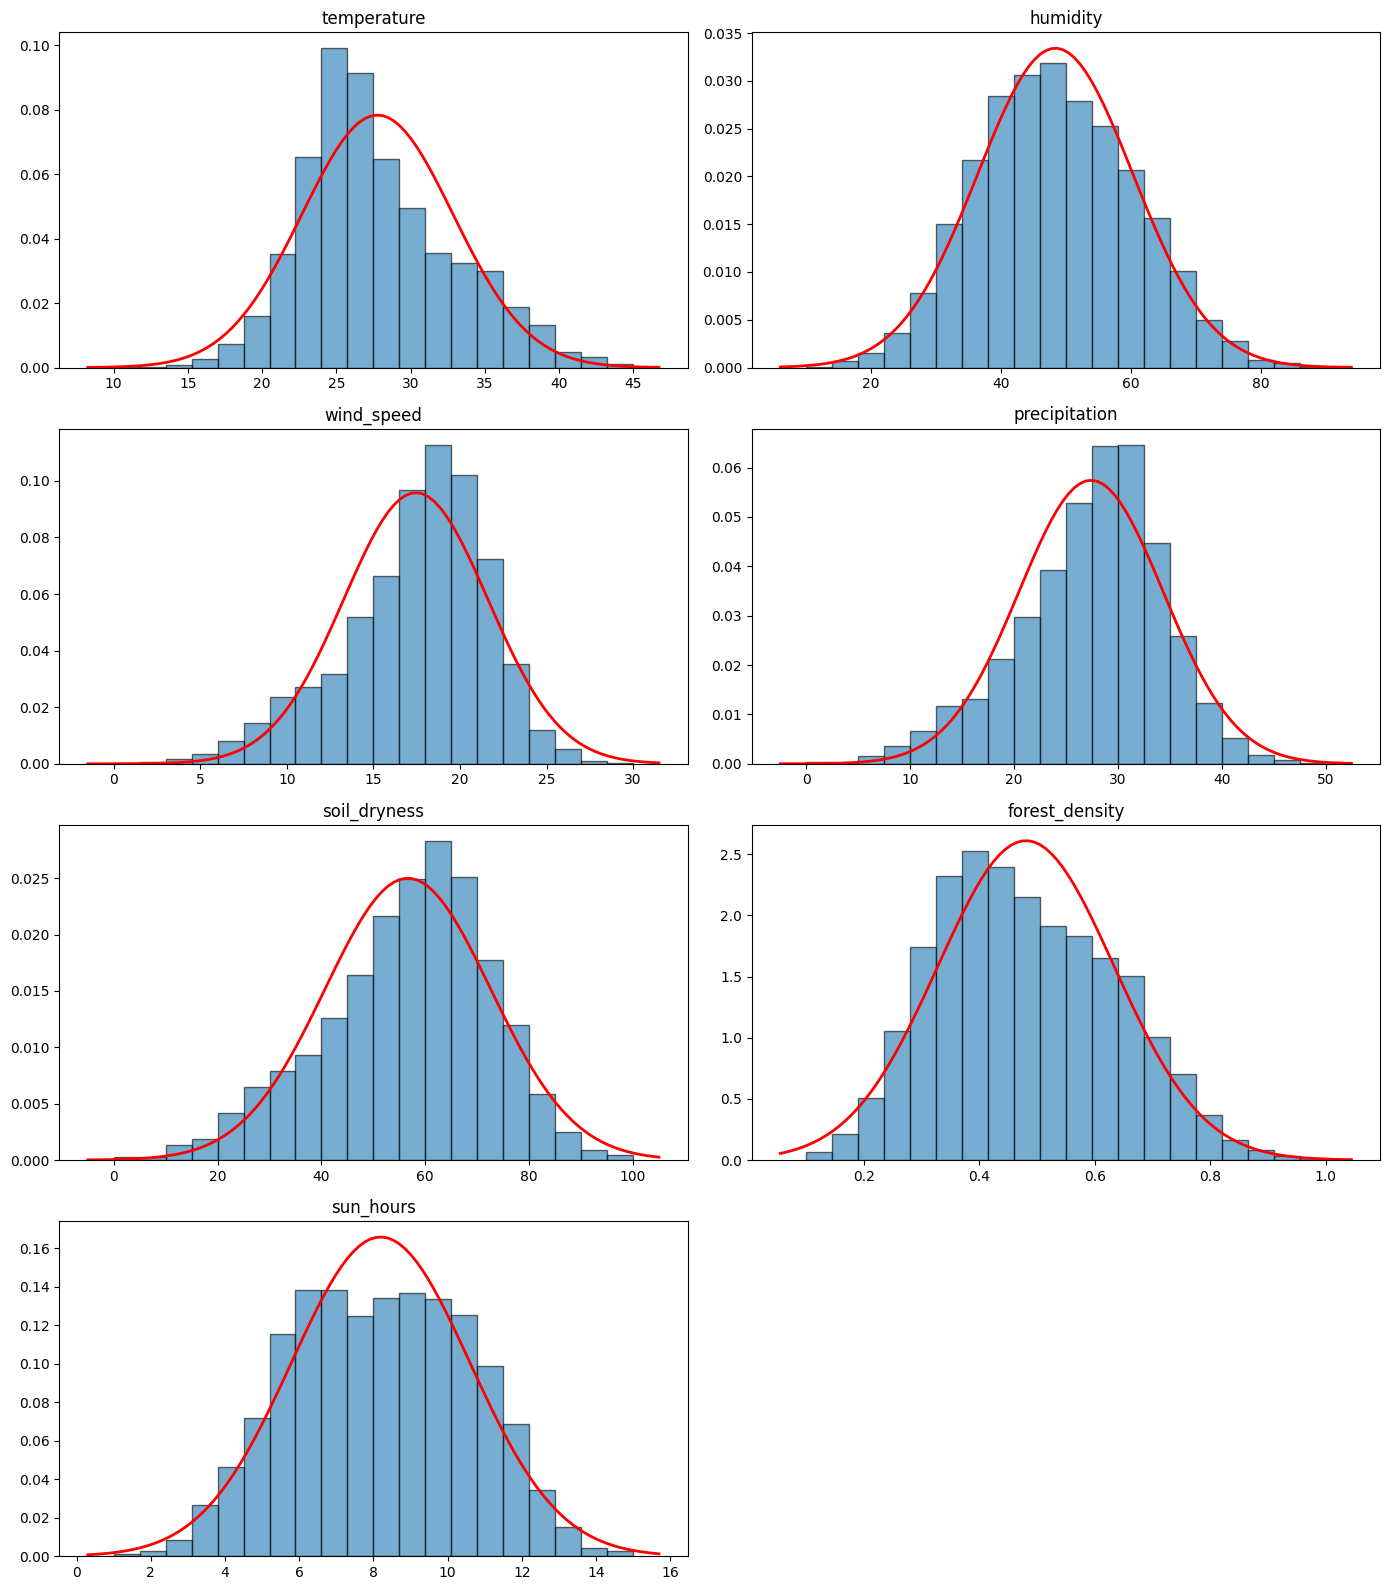

In [ ]:
import scipy.stats as stats

columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns

filas = 4
columnas = 2
fig, axes = plt.subplots(filas, columnas, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    data = df[col].dropna()

    ax.hist(data, bins=20, density=True, alpha=0.6, edgecolor='black')
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    ax.plot(x, p, 'r', linewidth=2)
    ax.set_title(col)

# Elimina gráficos vacíos si hay menos de filas * columnas
for j in range(len(columnas_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

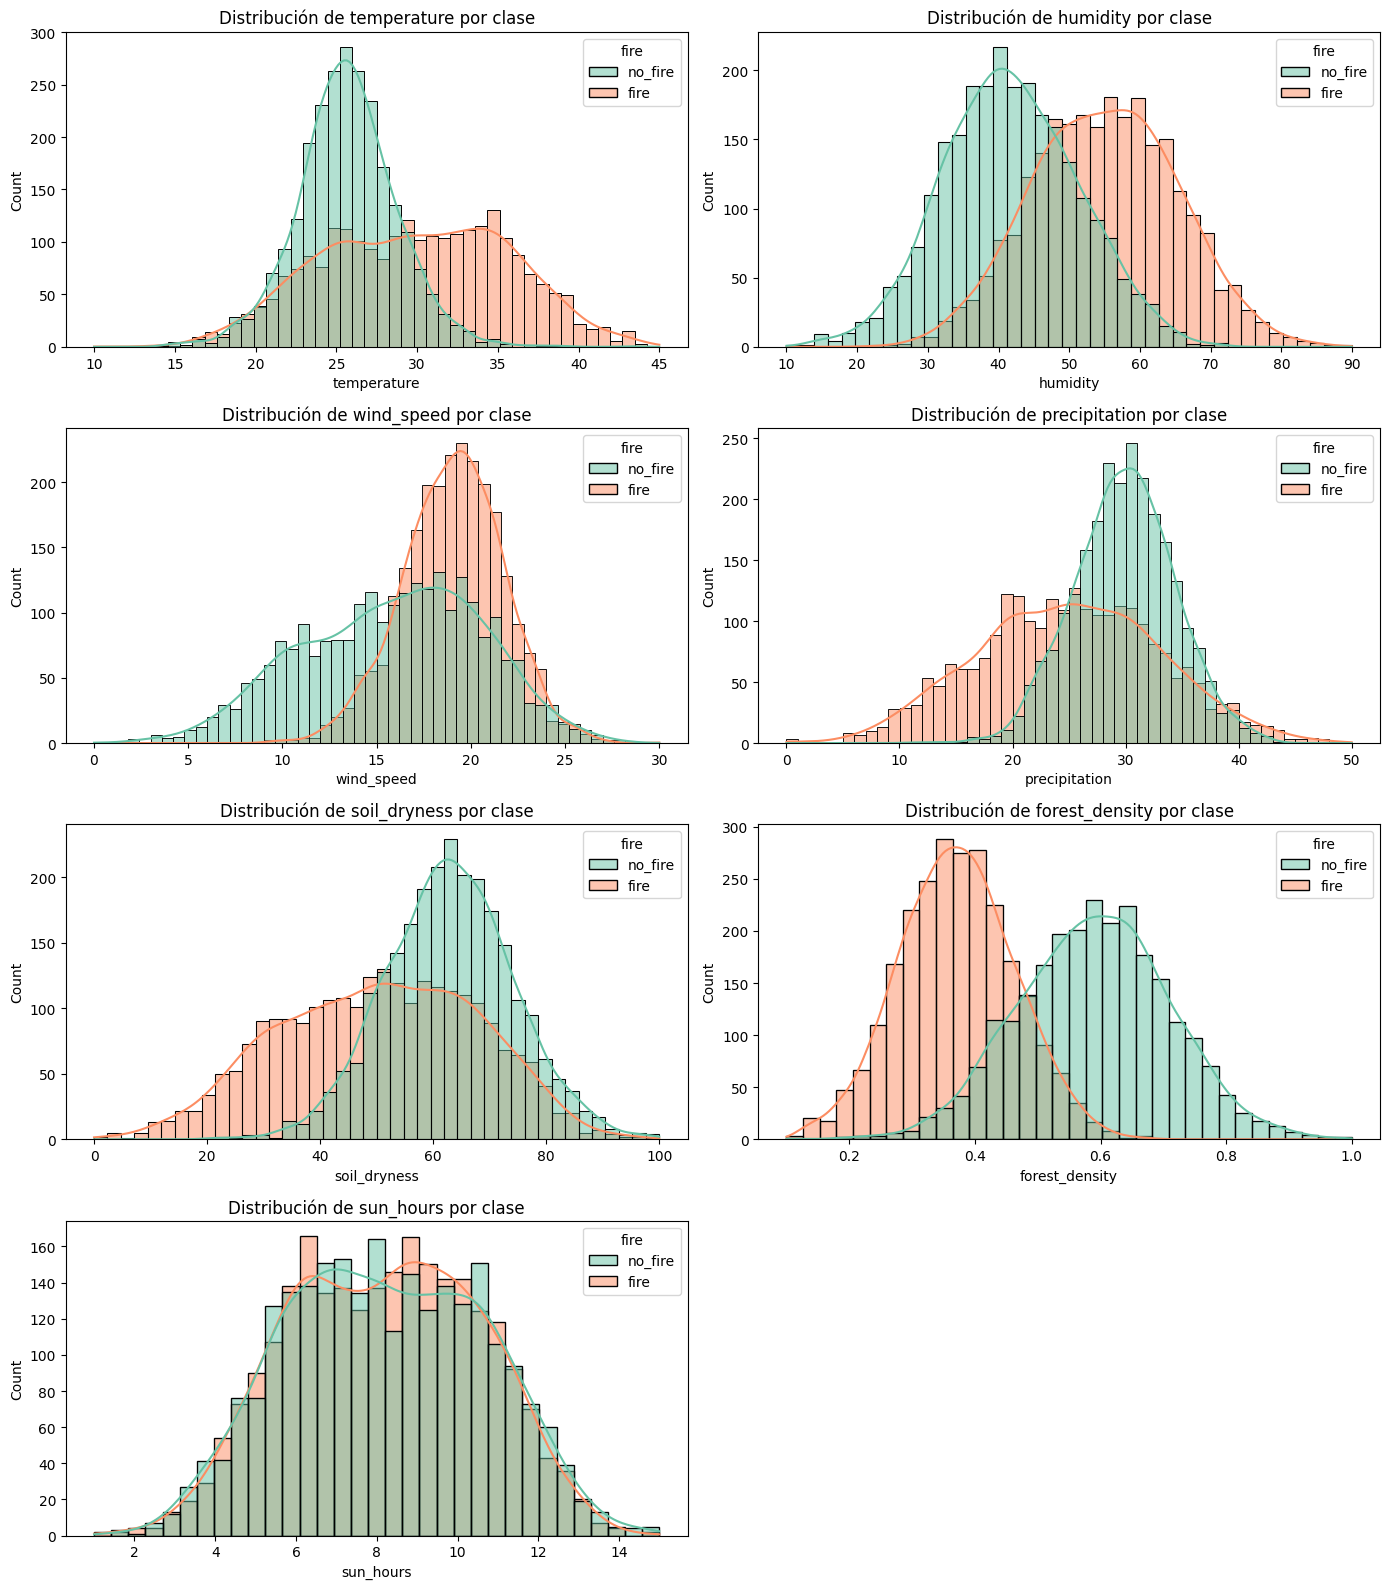

In [ ]:
# Comprovación de la distribución de los datos
"""
En general, las variables del conjunto de datos presentan una separación moderada entre las clases `fire` y `no_fire`,
aunque con cierta superposición en la mayoría de casos. Variables como `temperature`, `humidity`, `wind_speed`, `precipitation`,
`soil_dryness` y `forest_density` muestran patrones distintos según la presencia de incendios,
lo que indica su potencial utilidad para la predicción. En cambio, `sun_hours` presenta distribuciones muy similares
entre clases y parece tener un valor predictivo limitado de forma individual. Aun así, la combinación de todas
las variables podría aportar información complementaria que mejore el rendimiento de los modelos de clasificación.
"""

import math

caracteristicas = df.columns[:-1]
num_graficos = len(caracteristicas)
columnas = 2
filas = math.ceil(num_graficos / columnas)

fig, axes = plt.subplots(filas, columnas, figsize=(14, filas * 4))
axes = axes.flatten()

for i, caracteristica in enumerate(caracteristicas):
    sns.histplot(data=df, x=caracteristica, hue='fire', kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribución de {caracteristica} por clase")
    axes[i].set_xlabel(caracteristica)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlaciones con la variable objectivo

In [ ]:
# Convierte la variable objetivo a 0 y 1, funciona mejor así
df['fire'] = df['fire'].map({'fire': 1, 'no_fire': 0})

In [ ]:
# Mostramos la correlación entre cada variable numérica y la variable objetivo
"""
La variable más relacionada con los incendios es la densidad forestal, que muestra una relación inversa clara.
También destacan la humedad y la temperatura, que se asocian positivamente con la aparición de incendios.
El viento, la sequedad del suelo y la precipitación tienen una influencia más moderada.
En cambio, las horas de sol apenas muestran relación con la variable objetivo.
"""

correlaciones = df.select_dtypes(include=["float64", "int64"]).corr()["fire"].drop("fire")
print(correlaciones)

temperature       0.414614
humidity          0.557801
wind_speed        0.382591
precipitation    -0.355702
soil_dryness     -0.394039
forest_density   -0.716505
sun_hours        -0.006745
Name: fire, dtype: float64


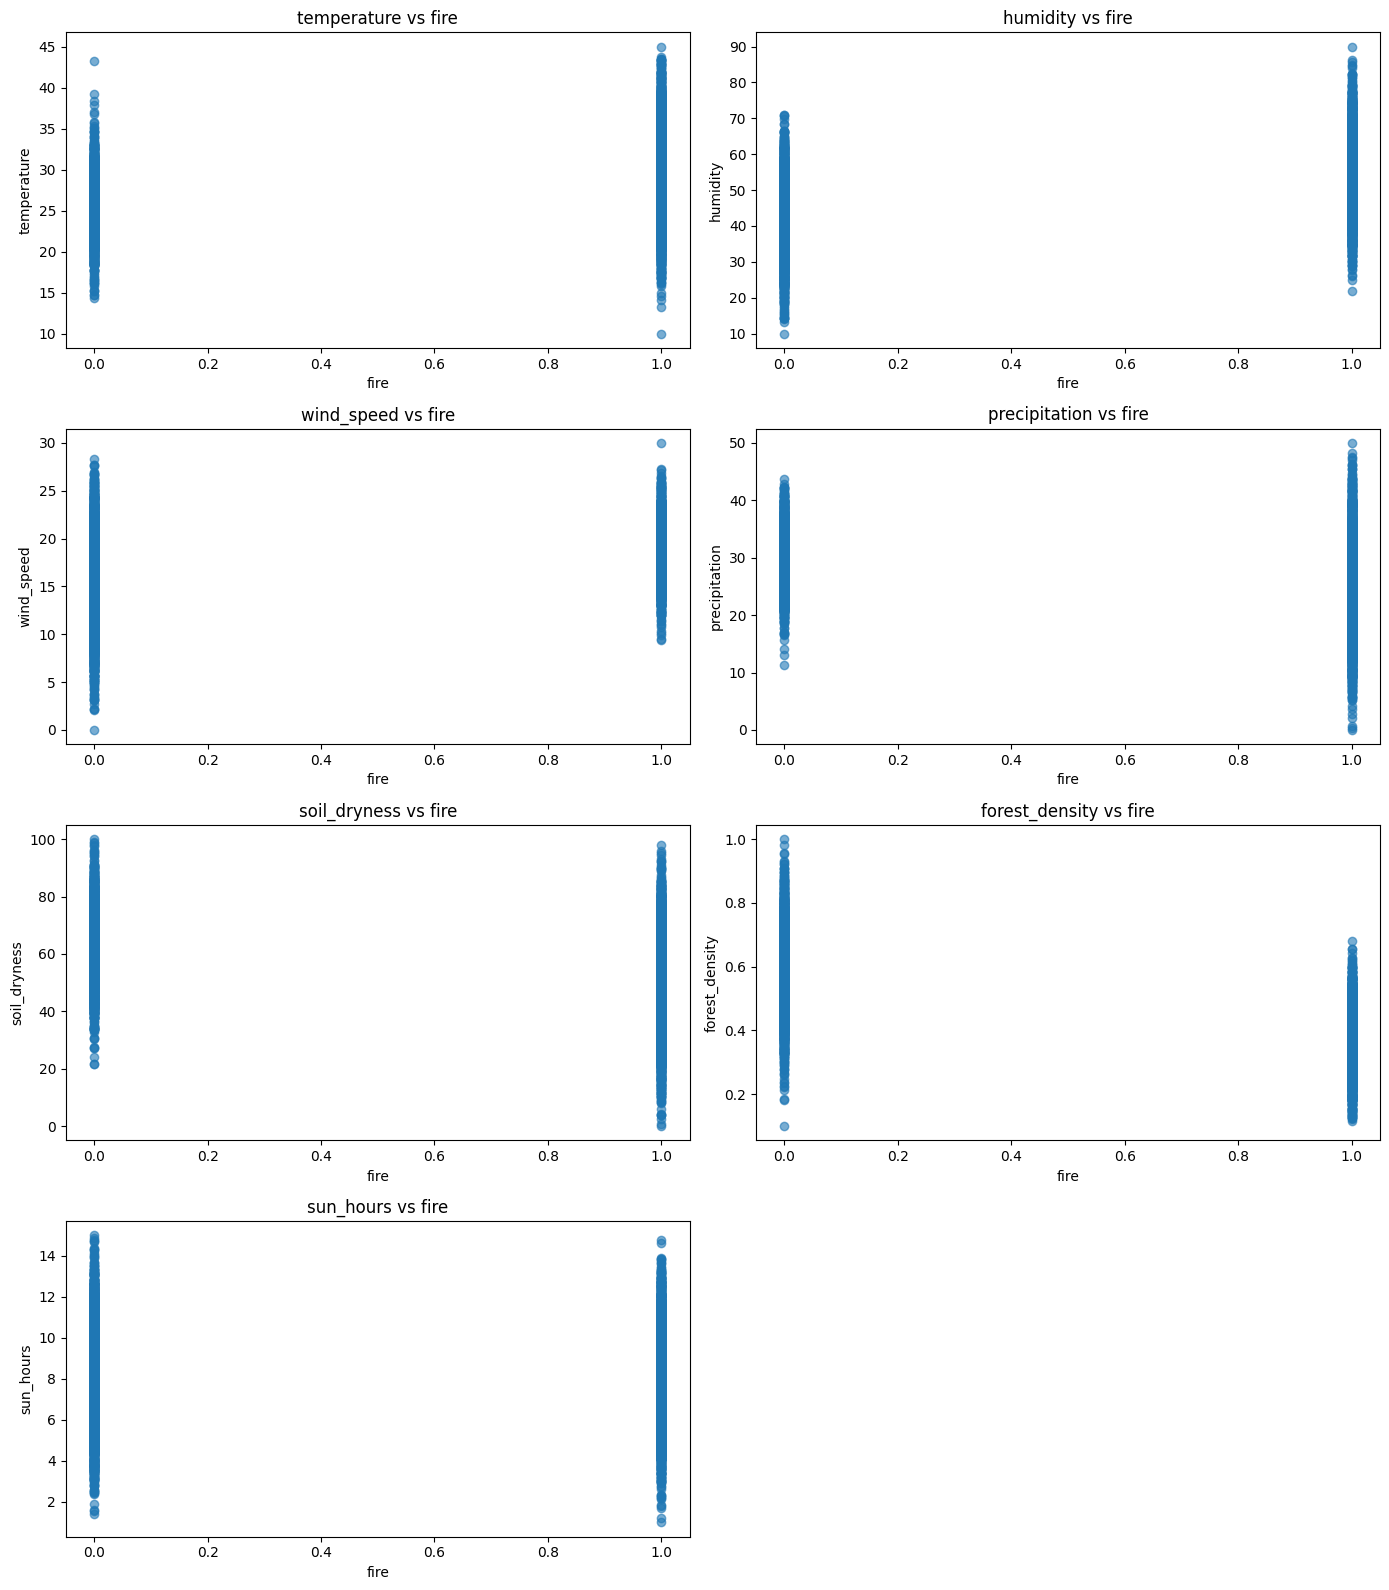

In [ ]:
caracteristicas = df.select_dtypes(include=["float64", "int64"]).columns.drop("fire")

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(caracteristicas):
    axes[i].scatter(df["fire"], df[col], alpha=0.6)
    axes[i].set_title(f"{col} vs fire")
    axes[i].set_xlabel("fire")
    axes[i].set_ylabel(col)

for j in range(len(caracteristicas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Equilibrio

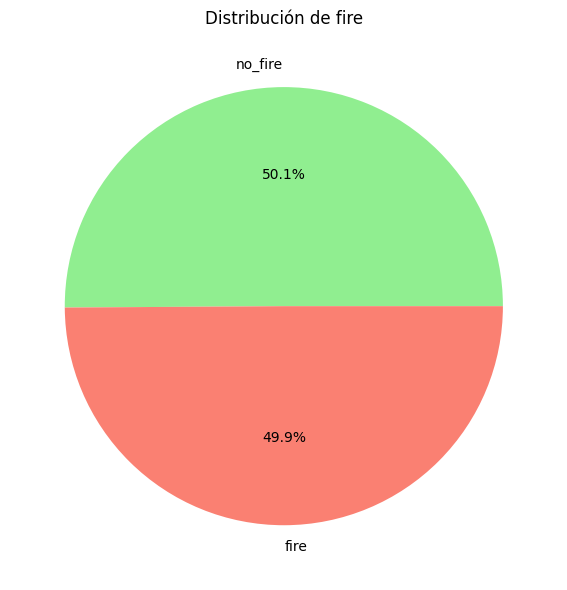

In [ ]:
plt.figure(figsize=(6, 6))
df['fire'].map({0: 'no_fire', 1: 'fire'}).value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Distribución de fire')
plt.ylabel("")
plt.tight_layout()
plt.show()

## Outliers

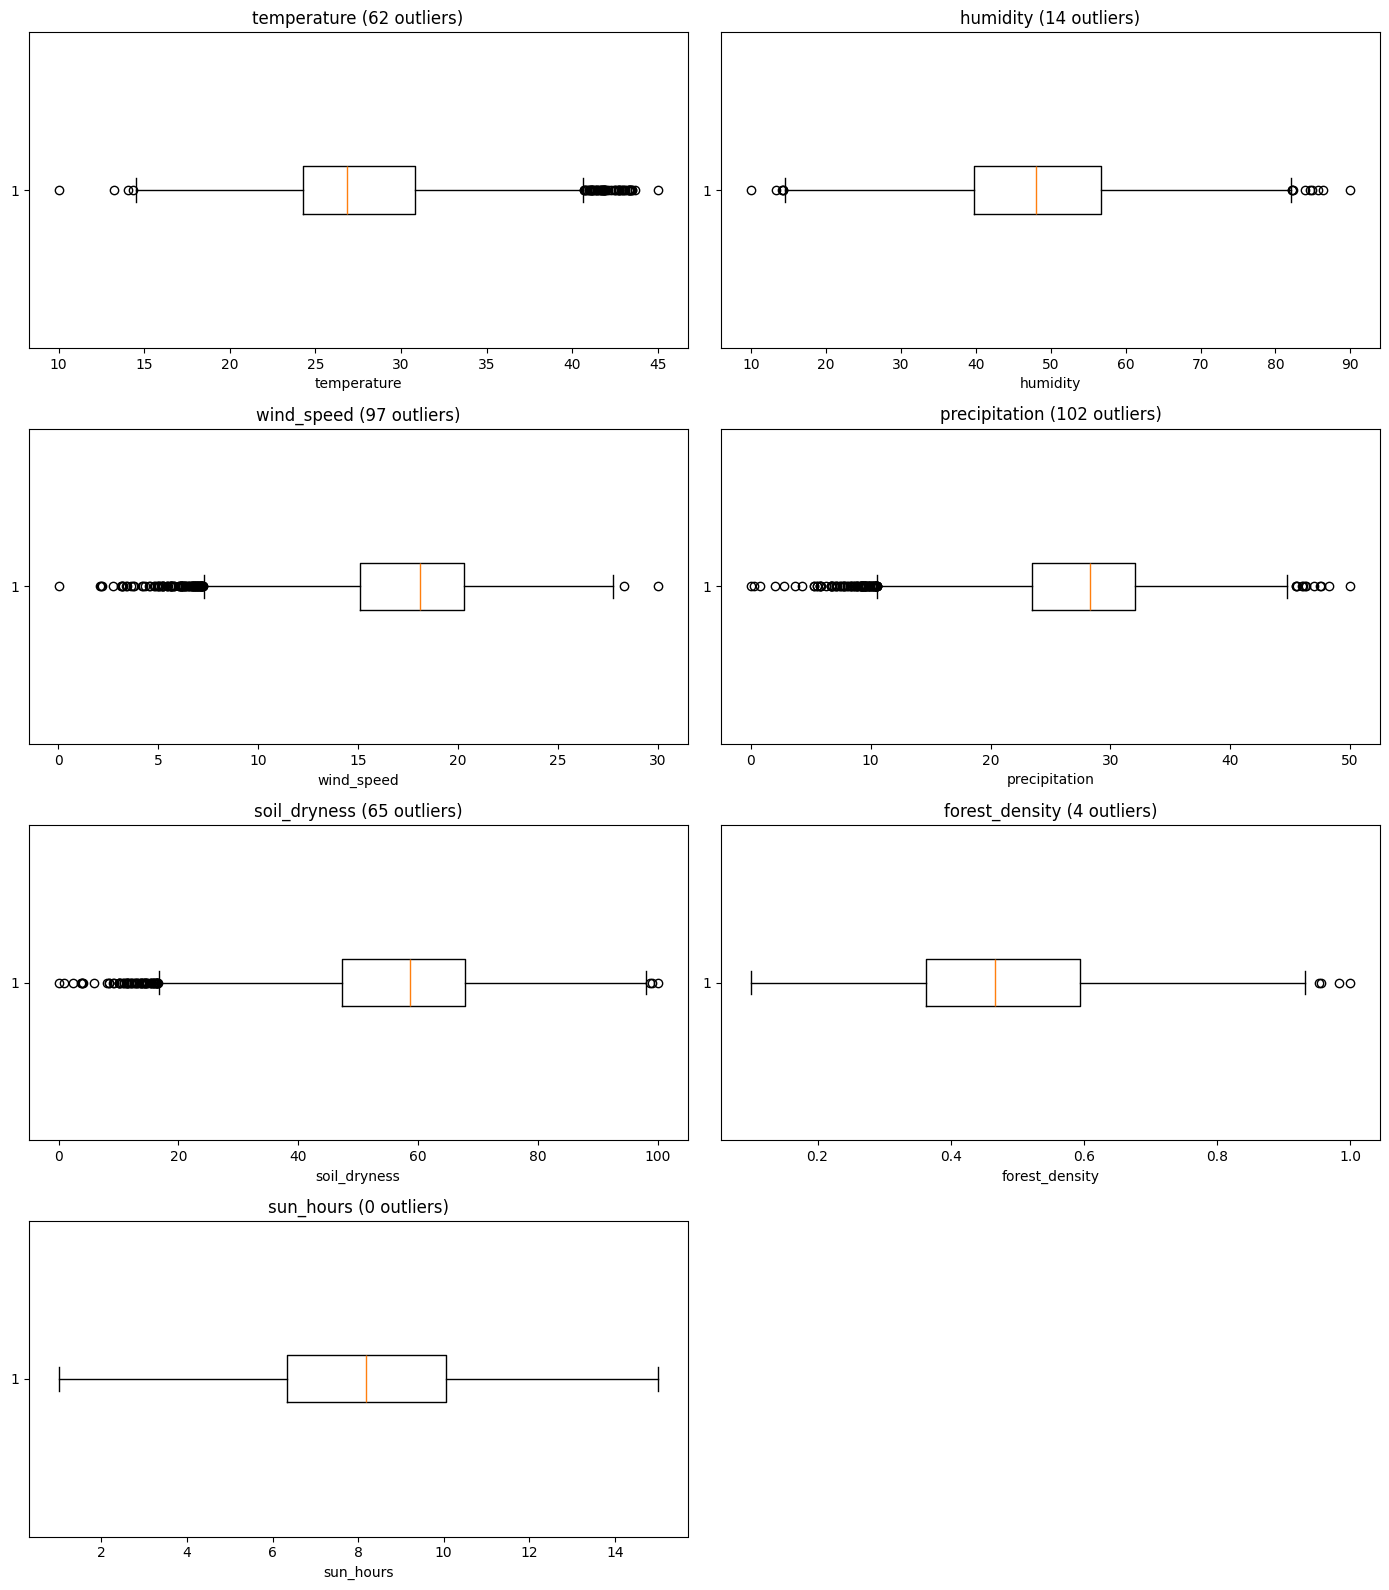

In [ ]:
columnas_numericas = df.select_dtypes(include=["float64", "int64"]).columns.drop("fire")

outliers = {}

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    n_outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    outliers[col] = n_outliers

    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(f"{col} ({n_outliers} outliers)")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
"""
De momento no eliminamos outliers porque el número es bajo en relación con el total de observaciones
y algunas variables como wind_speed o precipitation podrían tener valores extremos informativos.
Además, usaremos escalado robusto o normalización para reducir su impacto en los modelos.
"""
for col, cantidad in outliers.items():
    print(f"{col}: {cantidad} outliers detectados")

temperature: 62 outliers detectados
humidity: 14 outliers detectados
wind_speed: 97 outliers detectados
precipitation: 102 outliers detectados
soil_dryness: 65 outliers detectados
forest_density: 4 outliers detectados
sun_hours: 0 outliers detectados


# Fase 3: División de los datos

In [ ]:
# División previa de los datos del dataframe. X serán las características e y será la columna objetivo
X = df.drop('fire', axis=1)
y = df['fire']

In [ ]:
# División de los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encoders

No es necesario aplicar encoders porque no hay columnas de tipo object en el dataset

## Correlaciones

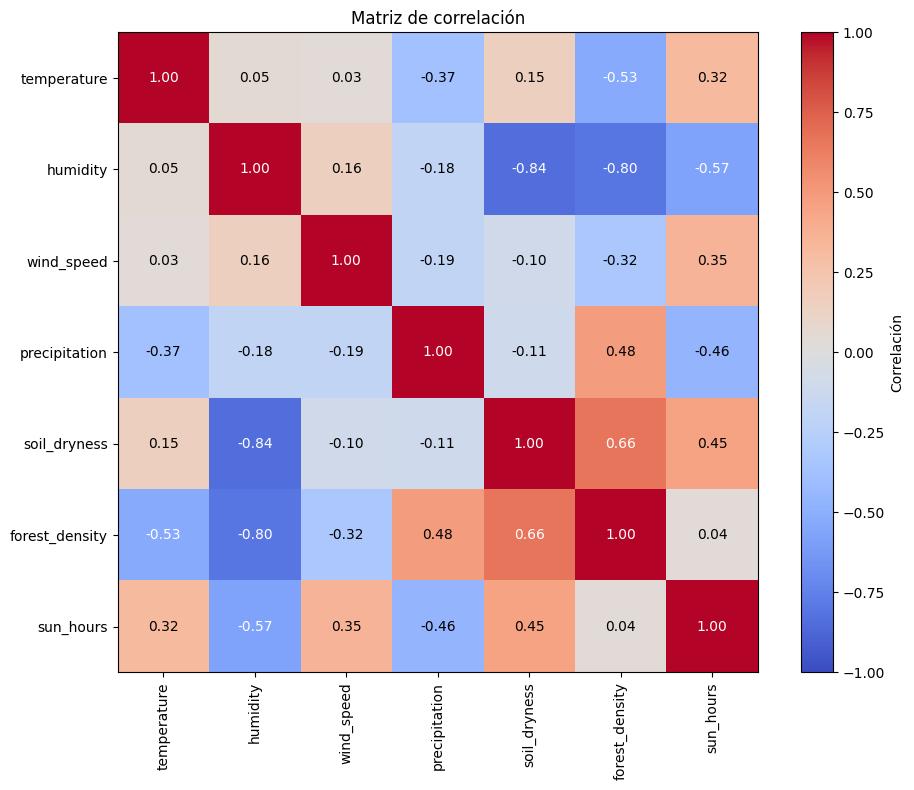

In [ ]:
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = X_train.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


La matriz muestra correlaciones fuertes entre `humidity`, `soil_dryness` y `forest_density`, lo que indica posibles redundancias entre estas variables. Aunque no es un problema en modelos como Random Forest, sí podría afectar a modelos lineales. El resto de variables presentan correlaciones bajas, por lo que aportan información independiente. De momento, no es necesario eliminar ninguna variable, pero conviene tener en cuenta estas relaciones si se opta por modelos sensibles a la multicolinealidad.


## Normalización y escalado

In [ ]:
# Aplicamos MinMaxScaler porque las variables tienen rangos distintos y no siguen una distribución normal.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (NB)

Exactitud: 0.9033
Precisión: 0.9089


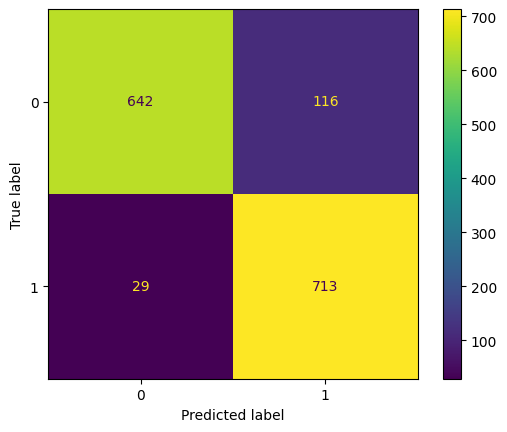

In [ ]:
# Inicialización del clasificador
clasificador_NB = GaussianNB()

# Entrenamiento del clasificador
clasificador_NB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_NB = clasificador_NB.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB);

# Cálculo de varias métricas de rendimiento
accuracy_NB = accuracy_score(y_test, predicciones_NB)
precision_NB = precision_score(y_test, predicciones_NB, average='weighted')
print(f"Exactitud: {accuracy_NB:.4f}")
print(f"Precisión: {precision_NB:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (k-NN)

Exactitud: 0.9713
Precisión: 0.9714


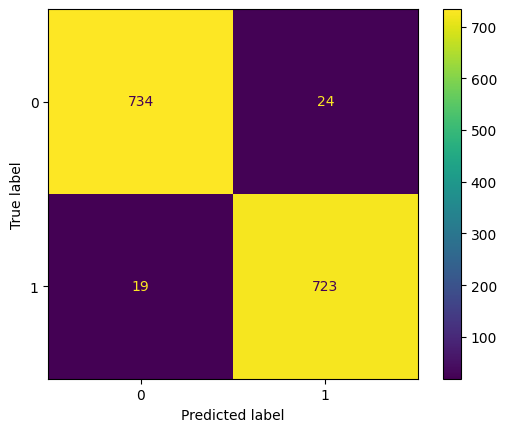

In [ ]:
# Inicialización del clasificador
clasificador_KNN = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del clasificador
clasificador_KNN.fit(X_train, y_train)

# Realización de las predicciones
predicciones_KNN = clasificador_KNN.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN);

# Cálculo de varias métricas de rendimiento
accuracy_KNN = accuracy_score(y_test, predicciones_KNN)
precision_KNN = precision_score(y_test, predicciones_KNN, average='weighted')
print(f"Exactitud: {accuracy_KNN:.4f}")
print(f"Precisión: {precision_KNN:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RL)

Exactitud: 0.8740
Precisión: 0.8743


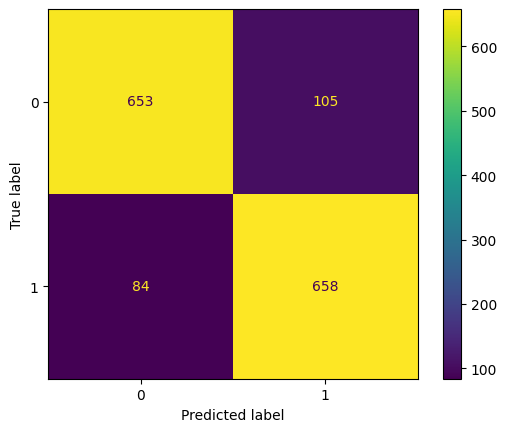

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicialización del clasificador
clasificador_RL = LogisticRegression(max_iter=1000)

# Entrenamiento del clasificador
clasificador_RL.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RL = clasificador_RL.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RL);

# Cálculo de varias métricas de rendimiento
accuracy_RL = accuracy_score(y_test, predicciones_RL)
precision_RL = precision_score(y_test, predicciones_RL, average='weighted')
print(f"Exactitud: {accuracy_RL:.4f}")
print(f"Precisión: {precision_RL:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (SVC)

Exactitud: 0.9753
Precisión: 0.9753


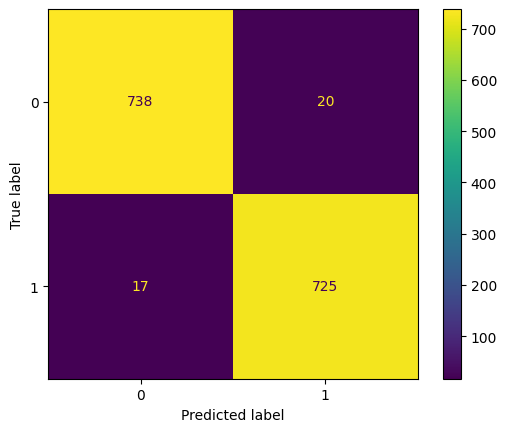

In [ ]:
# Inicialización del clasificador
clasificador_SVC = SVC()

# Entrenamiento del clasificador
clasificador_SVC.fit(X_train, y_train)

# Realización de las predicciones
predicciones_SVC = clasificador_SVC.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC);

# Cálculo de varias métricas de rendimiento
accuracy_SVC = accuracy_score(y_test, predicciones_SVC)
precision_SVC = precision_score(y_test, predicciones_SVC, average='weighted')
print(f"Exactitud: {accuracy_SVC:.4f}")
print(f"Precisión: {precision_SVC:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (DT)

Exactitud: 0.9467
Precisión: 0.9467


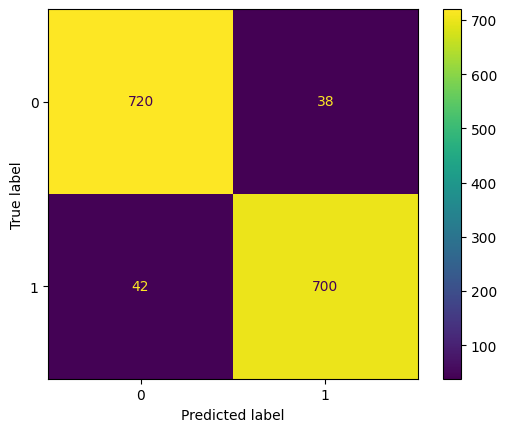

In [ ]:
# Inicialización del clasificador
clasificador_DT = DecisionTreeClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_DT.fit(X_train, y_train)

# Realización de las predicciones
predicciones_DT = clasificador_DT.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT);

# Cálculo de varias métricas de rendimiento
accuracy_DT = accuracy_score(y_test, predicciones_DT)
precision_DT = precision_score(y_test, predicciones_DT, average='weighted')
print(f"Exactitud: {accuracy_DT:.4f}")
print(f"Precisión: {precision_DT:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RF)

Exactitud: 0.9713
Precisión: 0.9714


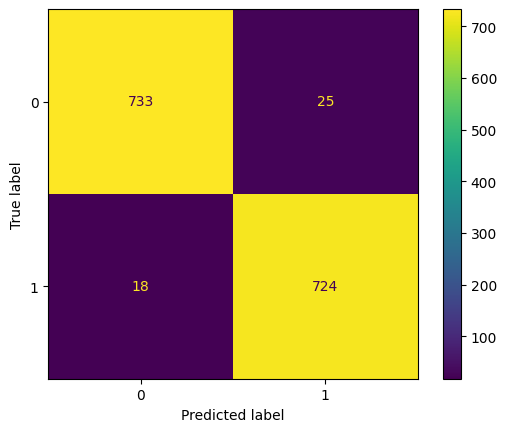

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicialización del clasificador
clasificador_RF = RandomForestClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_RF.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RF = clasificador_RF.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF);

# Cálculo de varias métricas de rendimiento
accuracy_RF = accuracy_score(y_test, predicciones_RF)
precision_RF = precision_score(y_test, predicciones_RF, average='weighted')
print(f"Exactitud: {accuracy_RF:.4f}")
print(f"Precisión: {precision_RF:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Adaboost)

Exactitud: 0.9340
Precisión: 0.9348


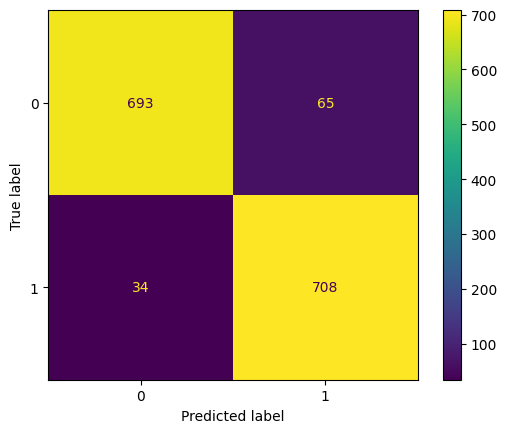

In [ ]:
# Inicialización del clasificador
clasificador_AB = AdaBoostClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_AB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_AB = clasificador_AB.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB);

# Cálculo de varias métricas de rendimiento
accuracy_AB = accuracy_score(y_test, predicciones_AB)
precision_AB = precision_score(y_test, predicciones_AB, average='weighted')
print(f"Exactitud: {accuracy_AB:.4f}")
print(f"Precisión: {precision_AB:.4f}")

| Modelo                  | Exactitud | Precisión |
|------------------------|-----------|-----------|
| Naive Bayes            | 0.9033    | 0.9089    |
| K-Nearest Neighbors    | 0.9713    | 0.9714    |
| Regresión Logística    | 0.8740    | 0.8743    |
| Support Vector Machine | 0.9753    | 0.9753    |
| Árbol de Decisión      | 0.9467    | 0.9467    |
| Random Forest          | 0.9713    | 0.9714    |
| AdaBoost               | 0.9340    | 0.9348    |

**Exactitud** es el porcentaje total de aciertos del modelo. Compara todas las predicciones con la realidad y dice cuántas veces ha acertado, tanto si predice "hay incendio" como "no hay incendio".

**Precisión** solo se fija en las veces que el modelo dice "hay incendio". De esas, cuenta cuántas son realmente incendios. Como de fiable es.

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (NB)

Mejores hiperparámetros: {'var_smoothing': 1e-09}
Exactitud: 0.9033
Precisión: 0.9089


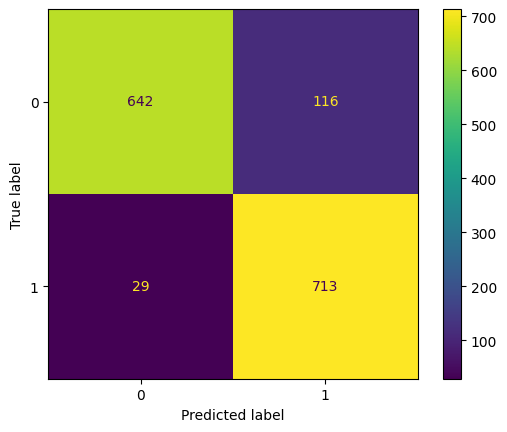

In [ ]:
# Inicialización del clasificador
clasificador_NB2 = GaussianNB()

# Definición del grid de hiperparámetros
# var_smoothing evita divisiones por cero o varianzas demasiado pequeñas en las probabilidades
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_NB2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_NB2 = GaussianNB(**best_params)

# Entrenamiento del modelo optimizado
clasificador_NB2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_NB2 = clasificador_NB2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB2)

# Cálculo de métricas
accuracy_NB2 = accuracy_score(y_test, predicciones_NB2)
precision_NB2 = precision_score(y_test, predicciones_NB2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_NB2:.4f}")
print(f"Precisión: {precision_NB2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (k-NN)

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Exactitud: 0.9727
Precisión: 0.9727


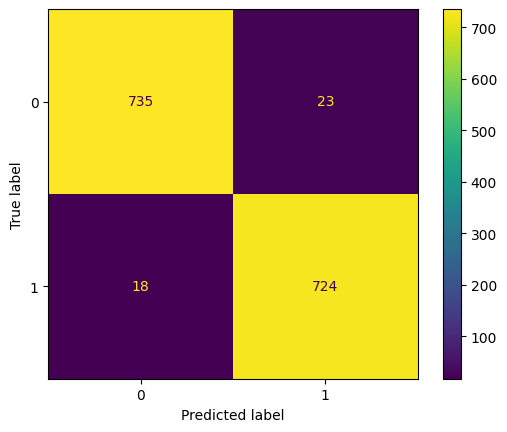

In [ ]:
# Inicialización del clasificador KNN
clasificador_KNN2 = KNeighborsClassifier()

# Definición del grid de hiperparámetros
# Se prueban distintos vecinos, distancias y formas de ponderar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_KNN2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_KNN2 = KNeighborsClassifier(**best_params)

# Entrenamiento del modelo optimizado
clasificador_KNN2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_KNN2 = clasificador_KNN2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN2)

# Cálculo de métricas
accuracy_KNN2 = accuracy_score(y_test, predicciones_KNN2)
precision_KNN2 = precision_score(y_test, predicciones_KNN2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_KNN2:.4f}")
print(f"Precisión: {precision_KNN2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RL)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2'}
Exactitud: 0.8787
Precisión: 0.8789


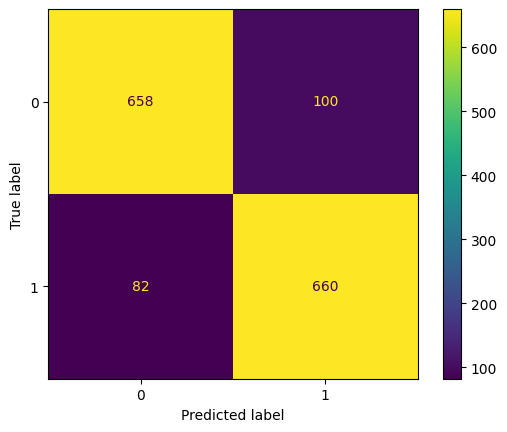

In [ ]:
# Inicialización del clasificador
clasificador_LR2 = LogisticRegression(solver='liblinear')

# Definición del grid de hiperparámetros
# La regularización evita que el modelo se sobreajuste a los datos de entrenamiento
# C controla la intensidad de esa regularización (valores bajos = más regularización)
# penalty indica el tipo de regularización a aplicar (en este caso L2 = Ridge)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_LR2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_LR2 = LogisticRegression(solver='liblinear', **best_params)

# Entrenamiento del modelo optimizado
clasificador_LR2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_LR2 = clasificador_LR2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_LR2)

# Cálculo de métricas
accuracy_LR2 = accuracy_score(y_test, predicciones_LR2)
precision_LR2 = precision_score(y_test, predicciones_LR2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_LR2:.4f}")
print(f"Precisión: {precision_LR2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (SVC)

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Exactitud: 0.9753
Precisión: 0.9753


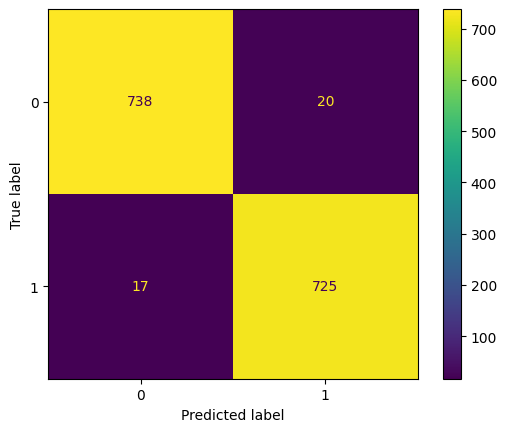

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

# Inicialización del clasificador SVC
clasificador_SVC2 = SVC()

# Definición del grid de hiperparámetros
# C controla la regularización (valores bajos = modelo más simple)
# kernel define la forma del límite de decisión
# gamma influye en el alcance de cada muestra como soporte (solo para RBF y sigmoid)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(clasificador_SVC2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear y entrenar el modelo final con los mejores hiperparámetros
clasificador_SVC2 = SVC(**best_params)
clasificador_SVC2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_SVC2 = clasificador_SVC2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC2)

# Cálculo de métricas
accuracy_SVC2 = accuracy_score(y_test, predicciones_SVC2)
precision_SVC2 = precision_score(y_test, predicciones_SVC2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_SVC2:.4f}")
print(f"Precisión: {precision_SVC2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (DT)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Exactitud: 0.9473
Precisión: 0.9475


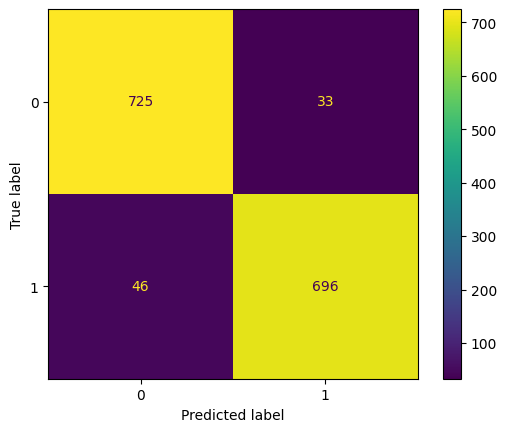

In [ ]:
# Inicialización del clasificador
clasificador_DT2 = DecisionTreeClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],               # Máxima profundidad del árbol (None = sin límite)
    'min_samples_split': [2, 5, 10],             # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],               # Mínimo de muestras en cada hoja (evita ramas muy pequeñas)
    'criterion': ['gini', 'entropy']             # Método para calcular la calidad de las divisiones
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_DT2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_DT2 = DecisionTreeClassifier(random_state=42, **best_params)
clasificador_DT2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_DT2 = clasificador_DT2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT2)
accuracy_DT2 = accuracy_score(y_test, predicciones_DT2)
precision_DT2 = precision_score(y_test, predicciones_DT2, average='weighted')
print(f"Exactitud: {accuracy_DT2:.4f}")
print(f"Precisión: {precision_DT2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RF)

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud: 0.9733
Precisión: 0.9734


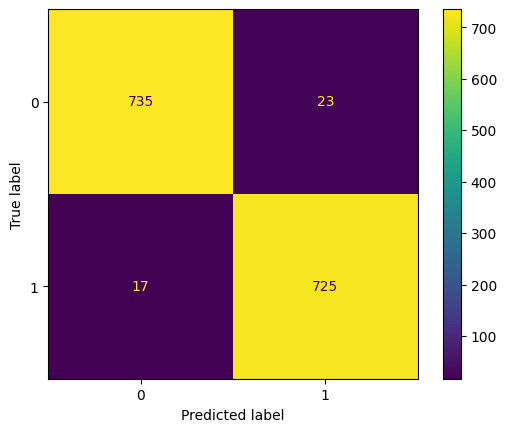

In [ ]:
# Inicialización del clasificador
clasificador_RF2 = RandomForestClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],             # Nº de árboles del bosque
    'max_depth': [None, 10, 20],                 # Profundidad máxima por árbol
    'min_samples_split': [2, 5],                 # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],                  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],            # Nº de variables consideradas en cada división
    'bootstrap': [True, False]                   # Si se usan muestras con reemplazo (bootstrapping)
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_RF2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_RF2 = RandomForestClassifier(random_state=42, **best_params)
clasificador_RF2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_RF2 = clasificador_RF2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF2)
accuracy_RF2 = accuracy_score(y_test, predicciones_RF2)
precision_RF2 = precision_score(y_test, predicciones_RF2, average='weighted')
print(f"Exactitud: {accuracy_RF2:.4f}")
print(f"Precisión: {precision_RF2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Adaboost)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Mejores hiperparámetros: {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 200}
Exactitud: 0.9487
Precisión: 0.9490


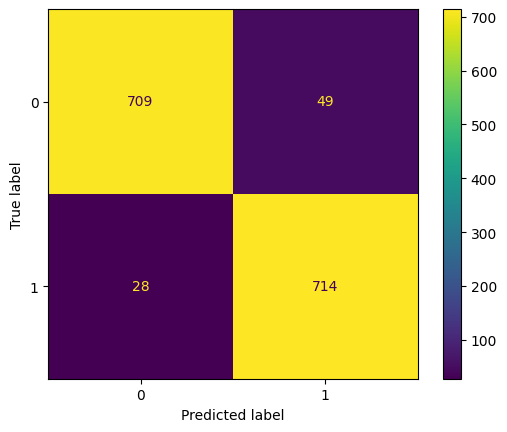

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicialización del clasificador
clasificador_AB2 = AdaBoostClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],              # Nº de clasificadores débiles (pasos de boosting)
    'learning_rate': [0.1, 0.5, 1.0, 1.5],       # Cuánto se ajusta el modelo en cada iteración
    'algorithm': ['SAMME', 'SAMME.R']            # Estrategia de actualización de pesos
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_AB2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_AB2 = AdaBoostClassifier(random_state=42, **best_params)
clasificador_AB2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_AB2 = clasificador_AB2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB2)
accuracy_AB2 = accuracy_score(y_test, predicciones_AB2)
precision_AB2 = precision_score(y_test, predicciones_AB2, average='weighted')
print(f"Exactitud: {accuracy_AB2:.4f}")
print(f"Precisión: {precision_AB2:.4f}")

| Modelo               | Exactitud (antes) | Precisión (antes) | Exactitud (después) | Precisión (después) |
|----------------------|-------------------|--------------------|----------------------|----------------------|
| Naive Bayes          | 0.9089            | 0.9047             | 0.9033               | 0.9089               |
| K-Nearest Neighbors  | 0.9583            | 0.9590             | 0.9727               | 0.9727               |
| Regresión Logística  | 0.8600            | 0.8615             | 0.8787               | 0.8789               |
| SVC (RBF)            | 0.9673            | 0.9671             | 0.9753               | 0.9753               |
| Árbol de decisión    | 0.9393            | 0.9402             | 0.9473               | 0.9475               |
| Random Forest        | 0.9573            | 0.9565             | 0.9733               | 0.9734               |
| AdaBoost             | 0.9453            | 0.9449             | 0.9487               | 0.9490               |


# Fase 8: Conclusiones

Aunque todos los modelos han mejorado tras la optimización, el SVC (con RBF) sigue siendo el que ofrece mejor resultado global. Es el modelo que ha alcanzado la mayor exactitud y precisión, tanto antes como después, y por tanto es el que escogeríamos como mejor clasificador para este problema.

# Fase 9: Pruebas

## Guardar el modelo

In [ ]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = clasificador_SVC2

# Ruta donde guardar el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'

# Crear el directorio si no existe
os.makedirs(ruta, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/mejor_modelo.pkl


## Cargamos el modelo

In [ ]:
# Importar librerías necesarias
from google.colab import drive
import joblib
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardaste el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Cargar el modelo sin necesidad de volver a entrenarlo
mejor_modelo = joblib.load(ruta_modelo)
print("¡Modelo cargado correctamente!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Modelo cargado correctamente!


## Comprobación del sobreajuste

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluación con validación cruzada sobre los datos de entrenamiento
cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

print(f"Precisión media en validación cruzada: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Precisión media en validación cruzada: 0.9757 - Desviación estándar: 0.0048


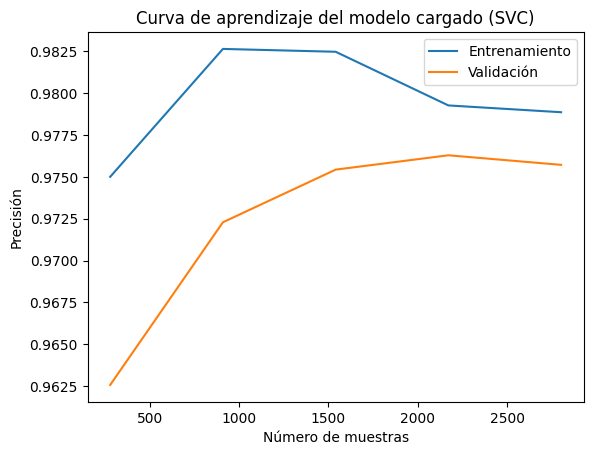

In [ ]:
"""
El modelo SVC con kernel RBF presenta la mayor precisión (0.9753) y una curva de aprendizaje muy equilibrada,
con poca diferencia entre entrenamiento y validación, lo que indica una excelente capacidad de generalización sin sobreajuste.
La precisión se mantiene estable a medida que aumentan las muestras,
lo que refuerza su robustez. Por tanto, es la mejor opción para este caso si no hay limitaciones de recursos o velocidad de predicción.
"""
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado (SVC)')
plt.show()

## Nuevas predicciones

In [ ]:
# Ejemplo de una nueva observación -> debería salir "no_fire"
nueva_observacion = pd.DataFrame({
    'temperature': [24.92],         # Temperatura en ºC
    'humidity': [29.23],            # Humedad relativa en %
    'wind_speed': [19.4],           # Velocidad del viento en km/h
    'precipitation': [31.72],       # Precipitación acumulada en mm
    'soil_dryness': [73.01],        # Índice de sequedad del suelo (0 a 100)
    'forest_density': [0.38],       # Densidad forestal (0 a 1)
    'sun_hours': [10.9]             # Horas de sol diarias
})

# Lista de columnas numéricas (las mismas que se usaron para el entrenamiento)
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar el mismo escalado MinMax que se usó para entrenar el modelo
nueva_observacion[columnas_numericas] = scaler.transform(nueva_observacion[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion = mejor_modelo.predict(nueva_observacion)

# Mostrar el resultado de la predicción
if prediccion == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: no_fire


In [ ]:
# Ejemplo de una nueva observación -> debería salir "fire"
nueva_observacion2 = pd.DataFrame({
    'temperature': [23.80],         # Temperatura en ºC
    'humidity': [57.92],            # Humedad relativa en %
    'wind_speed': [20.05],          # Velocidad del viento en km/h
    'precipitation': [32.77],       # Precipitación acumulada en mm
    'soil_dryness': [41.86],        # Índice de sequedad del suelo (0 a 100)
    'forest_density': [0.44],       # Densidad forestal (0 a 1)
    'sun_hours': [6.08]             # Horas de sol diarias
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Escalar las características numéricas con MinMaxScaler
nueva_observacion2[columnas_numericas] = scaler.transform(nueva_observacion2[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion2 = mejor_modelo.predict(nueva_observacion2)

# Mostrar el resultado de la predicción
if prediccion2 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: fire


In [ ]:
# Seleccionar columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Obtener mínimo y máximo de cada columna
rangos = df[columnas_numericas].agg(['min', 'max']).transpose()
print(rangos)

                      min        max
temperature     10.000407  44.990119
humidity        10.004226  89.960415
wind_speed       0.004732  29.994154
precipitation    0.012623  49.996241
soil_dryness     0.004812  99.990098
forest_density   0.100099   0.999759
sun_hours        0.999759  14.996841


In [ ]:
# Ejemplo de una nueva observación extrema para predecir "fire"
nueva_observacion_extrema1 = pd.DataFrame({
    'temperature': [35.0],       # Temperatura muy alta
    'humidity': [5.0],           # Humedad muy baja
    'wind_speed': [29.0],        # Viento fuerte
    'precipitation': [5.0],      # Casi sin precipitación
    'soil_dryness': [80.0],      # Suelo muy seco
    'forest_density': [0.1],     # Poca densidad forestal
    'sun_hours': [12.0]          # Muchas horas de sol
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar escalado MinMax
nueva_observacion_extrema1[columnas_numericas] = scaler.transform(nueva_observacion_extrema1[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion_extrema1 = mejor_modelo.predict(nueva_observacion_extrema1)

# Mostrar el resultado de la predicción
if prediccion_extrema1 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: fire


In [ ]:
# Ejemplo de una nueva observación extrema para predecir "no_fire"
nueva_observacion_extrema2 = pd.DataFrame({
    'temperature': [15.0],       # Temperatura baja
    'humidity': [80.0],          # Humedad alta
    'wind_speed': [3.0],         # Viento muy débil
    'precipitation': [40.0],     # Mucha precipitación
    'soil_dryness': [10.0],      # Suelo húmedo
    'forest_density': [0.87],    # Densidad forestal alta
    'sun_hours': [2.0]           # Pocas horas de sol
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar escalado MinMax
nueva_observacion_extrema2[columnas_numericas] = scaler.transform(nueva_observacion_extrema2[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion_extrema2 = mejor_modelo.predict(nueva_observacion_extrema2)

# Mostrar el resultado de la predicción
if prediccion_extrema2 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: fire


# REGRESIÓN LOGÍSTICA OPTIMIZADO

In [ ]:
# Ejemplo de una nueva observación extrema para predecir "no_fire"
nueva_observacion_extrema2 = pd.DataFrame({
    'temperature': [15.0],       # Temperatura baja
    'humidity': [80.0],          # Humedad alta
    'wind_speed': [3.0],         # Viento muy débil
    'precipitation': [40.0],     # Mucha precipitación
    'soil_dryness': [10.0],      # Suelo húmedo
    'forest_density': [0.87],    # Densidad forestal alta
    'sun_hours': [2.0]           # Pocas horas de sol
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar el mismo escalado MinMax que se usó para entrenar el modelo
nueva_observacion_extrema2[columnas_numericas] = scaler.transform(nueva_observacion_extrema2[columnas_numericas])

# Realizar la predicción con el modelo Random Forest optimizado
prediccion_extrema2 = clasificador_LR2.predict(nueva_observacion_extrema2)

# Mostrar el resultado de la predicción
if prediccion_extrema2 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")


Predicción: no_fire


In [ ]:
# Ejemplo de una nueva observación extrema para predecir "fire"
nueva_observacion_extrema1 = pd.DataFrame({
    'temperature': [35.0],       # Temperatura muy alta
    'humidity': [5.0],           # Humedad muy baja
    'wind_speed': [29.0],        # Viento fuerte
    'precipitation': [5.0],      # Casi sin precipitación
    'soil_dryness': [80.0],      # Suelo muy seco
    'forest_density': [0.1],     # Poca densidad forestal
    'sun_hours': [12.0]          # Muchas horas de sol
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar escalado MinMax
nueva_observacion_extrema1[columnas_numericas] = scaler.transform(nueva_observacion_extrema1[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion_extrema1 = clasificador_LR2.predict(nueva_observacion_extrema1)

# Mostrar el resultado de la predicción
if prediccion_extrema1 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: fire


In [ ]:
# Ejemplo de una nueva observación -> debería salir "fire"
nueva_observacion2 = pd.DataFrame({
    'temperature': [23.80],         # Temperatura en ºC
    'humidity': [57.92],            # Humedad relativa en %
    'wind_speed': [20.05],          # Velocidad del viento en km/h
    'precipitation': [32.77],       # Precipitación acumulada en mm
    'soil_dryness': [41.86],        # Índice de sequedad del suelo (0 a 100)
    'forest_density': [0.44],       # Densidad forestal (0 a 1)
    'sun_hours': [6.08]             # Horas de sol diarias
})

# Lista de columnas numéricas
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Escalar las características numéricas con MinMaxScaler
nueva_observacion2[columnas_numericas] = scaler.transform(nueva_observacion2[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion2 = clasificador_LR2.predict(nueva_observacion2)

# Mostrar el resultado de la predicción
if prediccion2 == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: fire


In [ ]:
# Ejemplo de una nueva observación -> debería salir "no_fire"
nueva_observacion = pd.DataFrame({
    'temperature': [24.92],         # Temperatura en ºC
    'humidity': [29.23],            # Humedad relativa en %
    'wind_speed': [19.4],           # Velocidad del viento en km/h
    'precipitation': [31.72],       # Precipitación acumulada en mm
    'soil_dryness': [73.01],        # Índice de sequedad del suelo (0 a 100)
    'forest_density': [0.38],       # Densidad forestal (0 a 1)
    'sun_hours': [10.9]             # Horas de sol diarias
})

# Lista de columnas numéricas (las mismas que se usaron para el entrenamiento)
columnas_numericas = ['temperature', 'humidity', 'wind_speed', 'precipitation', 'soil_dryness', 'forest_density', 'sun_hours']

# Aplicar el mismo escalado MinMax que se usó para entrenar el modelo
nueva_observacion[columnas_numericas] = scaler.transform(nueva_observacion[columnas_numericas])

# Realizar la predicción con el mejor modelo cargado
prediccion = clasificador_LR2.predict(nueva_observacion)

# Mostrar el resultado de la predicción
if prediccion == 1:
    print("Predicción: fire")
else:
    print("Predicción: no_fire")

Predicción: no_fire


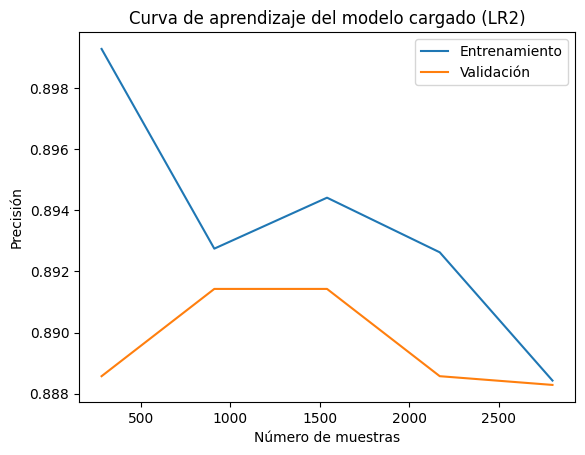

In [ ]:
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clasificador_LR2, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado (LR2)')
plt.show()

El gráfico muestra la curva de aprendizaje del modelo de regresión logística optimizado (LR2). En este caso, no se observa sobreajuste significativo. Podemos verlo porque las líneas de precisión en entrenamiento y validación están bastante próximas durante todo el rango de muestras. Aunque la precisión en entrenamiento empieza algo más alta y luego desciende ligeramente, la de validación se mantiene estable y cercana. Si hubiera sobreajuste, veríamos una separación más grande entre ambas líneas, con la de entrenamiento muy por encima de la de validación. Aquí, en cambio, el comportamiento del modelo es coherente y generaliza bien incluso al aumentar el número de datos.

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluación con validación cruzada sobre los datos de entrenamiento
cv_scores = cross_val_score(clasificador_LR2, X_train, y_train, cv=5, scoring='accuracy')

print(f"Precisión media en validación cruzada: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Precisión media en validación cruzada: 0.8883 - Desviación estándar: 0.0049


Tras evaluar múltiples modelos con y sin optimización, combinando curvas de aprendizaje y predicciones sobre observaciones reales y extremas, se concluye que el modelo SVC con kernel RBF es el más equilibrado, logrando una excelente precisión y generalización. Sin embargo, la regresión logística optimizada (LR2), pese a tener menor precisión inicial, destaca por su robustez ante casos extremos y bajo riesgo de sobreajuste, lo que la convierte en una opción especialmente fiable en contextos donde la interpretabilidad y la generalización son prioritarias. Esta combinación de resultados demuestra que no siempre el modelo más preciso es el más útil en la práctica: la estabilidad, la capacidad de generalizar y la respuesta ante nuevas situaciones son claves para escoger el mejor modelo en problemas reales como la predicción de incendios.